In [20]:
import pandas as pd
import requests
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
import numpy as np
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer    
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import sklearn

In [21]:
def load_DF(url):
  data = StringIO(requests.get(url).text)
  return pd.read_csv(data)

In [22]:
df = load_DF('https://raw.githubusercontent.com/mohannashahrad/Borealis_AI_Plant_Tree_Project/main/Final_Data/final_data2.csv')
df = df.iloc[: , 1:]
display(df.head())

,Time,Country Name,Land Area (m2),Agriculture Land (m2),Forest Land (m2),Population,Pop Growth (%),Urban Pop (%),GDP (US$),GDP Growth (%),Forest Rents (% GDP),Coal Rents (% GDP),Oil Rents (% GDP),CO2 Emission (kt),GHG Emision (CO2 eqv),Tree Loss (ha)
0,2001,Afghanistan,652860.0,377530.0,12084.4,21606992.0,3.902805,22.169,NaN,NaN,NaN,NaN,NaN,810.0,13490.0,88.092712
1,2002,Afghanistan,652860.0,377530.0,12084.4,22600774.0,4.496719,22.261,4.055180e+09,NaN,0.958004,0.004341,0.029101,1100.0,16090.0,178.640364
2,2003,Afghanistan,652860.0,379100.0,12084.4,23680871.0,4.668344,22.353,4.515559e+09,8.832278,0.664331,0.007422,0.026686,1350.0,16780.0,244.336255
3,2004,Afghanistan,652860.0,379110.0,12084.4,24726689.0,4.321560,22.500,5.226779e+09,1.414118,0.387787,0.016455,0.025399,1130.0,16520.0,201.444959
4,2005,Afghanistan,652860.0,379100.0,12084.4,25654274.0,3.682700,22.703,6.209138e+09,11.229715,0.332205,0.010904,0.025973,1640.0,17400.0,235.956834


In [23]:
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
df.reset_index(inplace=True, drop=True)
scaled_features = df.copy()
col_names = ['Land Area (m2)', 'Agriculture Land (m2)', 'Forest Land (m2)', 'Population', 'Pop Growth (%)', 'Urban Pop (%)',
                'GDP (US$)', 'GDP Growth (%)', 'Forest Rents (% GDP)', 'Coal Rents (% GDP)', 'Oil Rents (% GDP)', 'CO2 Emission (kt)',
                'GHG Emision (CO2 eqv)', 'Tree Loss (ha)']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features
scaled_features.head(20)

,Time,Country Name,Land Area (m2),Agriculture Land (m2),Forest Land (m2),Population,Pop Growth (%),Urban Pop (%),GDP (US$),GDP Growth (%),Forest Rents (% GDP),Coal Rents (% GDP),Oil Rents (% GDP),CO2 Emission (kt),GHG Emision (CO2 eqv),Tree Loss (ha)
0,2003,Afghanistan,-0.053191,0.151565,-0.280729,-0.121892,2.833507,-1.488437,-0.252053,0.966200,-0.325614,-0.195424,-0.367831,-0.225766,-0.238114,-0.266975
1,2004,Afghanistan,-0.053191,0.151580,-0.280729,-0.114761,2.540205,-1.481744,-0.251572,-0.476629,-0.391587,-0.185539,-0.367980,-0.226046,-0.238385,-0.267067
2,2005,Afghanistan,-0.053191,0.151565,-0.280729,-0.108437,1.999872,-1.472501,-0.250907,1.432500,-0.404847,-0.191614,-0.367914,-0.225396,-0.237467,-0.266993
3,2006,Afghanistan,-0.053191,0.151565,-0.280729,-0.103127,1.414446,-1.463213,-0.250391,0.290338,-0.375773,-0.191342,-0.368358,-0.225013,-0.233669,-0.267173
4,2007,Afghanistan,-0.053191,0.151565,-0.280729,-0.098576,0.994354,-1.453834,-0.248513,1.937539,-0.402332,-0.119929,-0.369223,-0.224477,-0.229663,-0.266957
5,2008,Afghanistan,-0.053191,0.151565,-0.280729,-0.094337,0.803583,-1.444410,-0.248268,0.011733,-0.399720,0.042073,-0.369056,-0.221887,-0.222715,-0.267268
6,2009,Afghanistan,-0.053191,0.151565,-0.280729,-0.089751,0.912439,-1.434940,-0.246692,3.408774,-0.418547,-0.065209,-0.370296,-0.219832,-0.217061,-0.267347
7,2010,Afghanistan,-0.053191,0.151580,-0.280729,-0.084360,1.208153,-1.425424,-0.244379,2.041814,-0.398589,0.028639,-0.370353,-0.216425,-0.208767,-0.267310
8,2011,Afghanistan,-0.053191,0.151565,-0.280729,-0.078006,1.543496,-1.415817,-0.243061,-0.668749,-0.410307,0.338492,-0.370161,-0.211845,-0.194433,-0.267256
9,2012,Afghanistan,-0.053191,0.151565,-0.280729,-0.070889,1.767199,-1.406165,-0.241575,1.728640,-0.421154,0.092211,-0.358186,-0.214154,-0.185983,-0.267414


In [24]:
discrete_columns = ["Country Name"]

for var in discrete_columns:
    enc = OneHotEncoder(handle_unknown='ignore')
    enc_df = pd.DataFrame(enc.fit_transform(df[[var]]).toarray())
    enc_df.columns = enc.get_feature_names([var])
    df = df.join(enc_df)
    df = df.drop([var], axis=1)

df.head(30)

,Time,Land Area (m2),Agriculture Land (m2),Forest Land (m2),Population,Pop Growth (%),Urban Pop (%),GDP (US$),GDP Growth (%),Forest Rents (% GDP),...,Country Name_Ukraine,Country Name_United Kingdom,Country Name_United States,Country Name_Uruguay,Country Name_Uzbekistan,Country Name_Vanuatu,"Country Name_Venezuela, RB",Country Name_Vietnam,Country Name_Zambia,Country Name_Zimbabwe
0,2003,652860.0,379100.00,12084.400,23680871.0,4.668344,22.353,4.515559e+09,8.832278,0.664331,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2004,652860.0,379110.00,12084.400,24726689.0,4.321560,22.500,5.226779e+09,1.414118,0.387787,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2005,652860.0,379100.00,12084.400,25654274.0,3.682700,22.703,6.209138e+09,11.229715,0.332205,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2006,652860.0,379100.00,12084.400,26433058.0,2.990524,22.907,6.971286e+09,5.357403,0.454077,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2007,652860.0,379100.00,12084.400,27100542.0,2.493830,23.113,9.747880e+09,13.826320,0.342749,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2008,652860.0,379100.00,12084.400,27722281.0,2.268273,23.320,1.010923e+10,3.924984,0.353698,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2009,652860.0,379100.00,12084.400,28394806.0,2.396978,23.528,1.243909e+10,21.390528,0.274778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2010,652860.0,379110.00,12084.400,29185511.0,2.746615,23.737,1.585657e+10,14.362441,0.358436,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2011,652860.0,379100.00,12084.400,30117411.0,3.143106,23.948,1.780429e+10,0.426355,0.309318,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2012,652860.0,379100.00,12084.400,31161378.0,3.407600,24.160,2.000160e+10,12.752287,0.263852,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
y = df['Tree Loss (ha)']
x = df.loc[:, df.columns != 'Tree Loss (ha)']
x = x[~x.isin([np.nan, np.inf, -np.inf]).any(1)]

In [28]:
X100 = shap.utils.sample(x, 100)

In [29]:
model = sklearn.linear_model.LinearRegression()
model.fit(x, y)

LinearRegression()

In [30]:
print("Model coefficients:\n")
for i in range(x.shape[1]):
    print(x.columns[i], "=", model.coef_[i].round(4))

Model coefficients:

Time = 3155.2951
Land Area (m2) = 0.0086
Agriculture Land (m2) = 0.1277
Forest Land (m2) = -0.0035
Population = 0.0003
Pop Growth (%) = 11435.6895
Urban Pop (%) = -441.4321
GDP (US$) = -0.0
GDP Growth (%) = 332.5446
Forest Rents (% GDP) = -2360.4736
Coal Rents (% GDP) = 2696.8203
Oil Rents (% GDP) = -1442.9005
CO2 Emission (kt) = -3.0568
GHG Emision (CO2 eqv) = 2.8094
Country Name_Afghanistan = -156581.3798
Country Name_Albania = 66056.7266
Country Name_Algeria = -126417.7792
Country Name_Angola = 7473.2951
Country Name_Antigua and Barbuda = 40718.1197
Country Name_Argentina = -250416.3476
Country Name_Armenia = 70947.2519
Country Name_Australia = -776234.6683
Country Name_Austria = 64738.9732
Country Name_Azerbaijan = -20600.1741
Country Name_Bahamas, The = 66243.2508
Country Name_Bangladesh = -277504.7593
Country Name_Barbados = 49369.0089
Country Name_Belarus = 53280.4949
Country Name_Belgium = 70260.5774
Country Name_Belize = 51078.2955
Country Name_Benin = 155

Permutation explainer: 2871it [01:26, 29.03it/s]                          


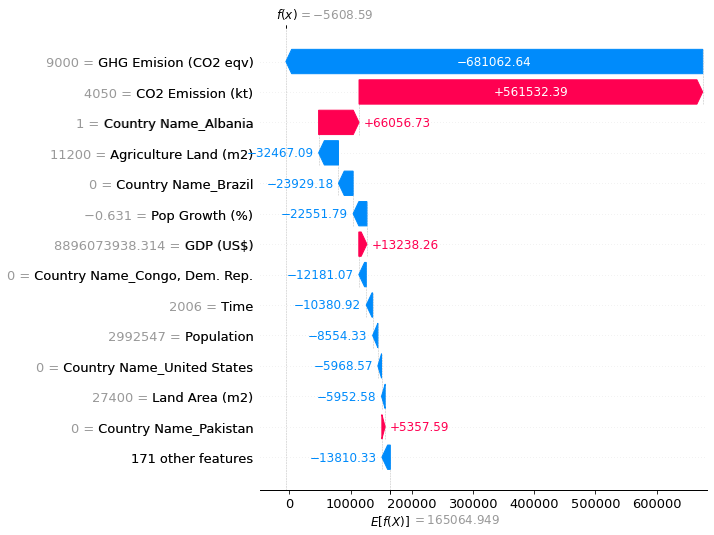

In [33]:
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(x)
sample_ind = 18
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

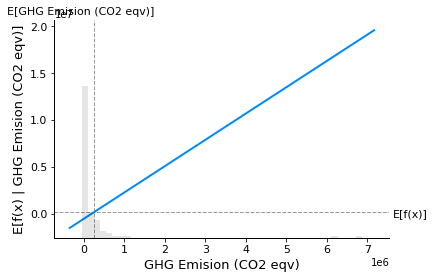

In [35]:
shap.plots.partial_dependence(
    "GHG Emision (CO2 eqv)", model.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

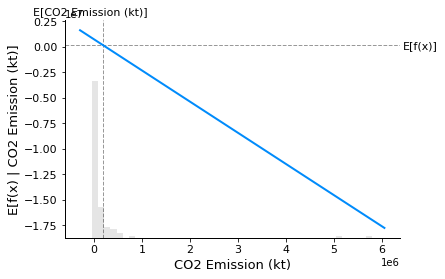

In [36]:
shap.plots.partial_dependence(
    "CO2 Emission (kt)", model.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)